Epoch 1/100
105/105 [==============================] - 1s 4ms/step - loss: 4.2171 - accuracy: 0.0000e+00 - val_loss: 3.9496 - val_accuracy: 0.0667
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 3.5901 - accuracy: 0.1143 - val_loss: 3.3541 - val_accuracy: 0.1778
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 2.9865 - accuracy: 0.2190 - val_loss: 2.7367 - val_accuracy: 0.1778
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 2.3936 - accuracy: 0.2571 - val_loss: 2.1330 - val_accuracy: 0.1778
Epoch 5/100
105/105 [==============================] - 0s 3ms/step - loss: 1.8444 - accuracy: 0.2095 - val_loss: 1.6286 - val_accuracy: 0.2222
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 1.4213 - accuracy: 0.2762 - val_loss: 1.2978 - val_accuracy: 0.2444
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 1.1994 - accuracy: 0.4095 - val_loss: 1.1437 - val_accuracy: 0.

Epoch 58/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8762 - val_loss: 0.3979 - val_accuracy: 0.9778
Epoch 59/100
105/105 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8952 - val_loss: 0.3996 - val_accuracy: 0.9111
Epoch 60/100
105/105 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.9143 - val_loss: 0.3945 - val_accuracy: 0.9111
Epoch 61/100
105/105 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.9238 - val_loss: 0.3911 - val_accuracy: 0.9333
Epoch 62/100
105/105 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8952 - val_loss: 0.3886 - val_accuracy: 0.9111
Epoch 63/100
105/105 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.9238 - val_loss: 0.3819 - val_accuracy: 0.9778
Epoch 64/100
105/105 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.9524 - val_loss: 0.3785 - val_accuracy:

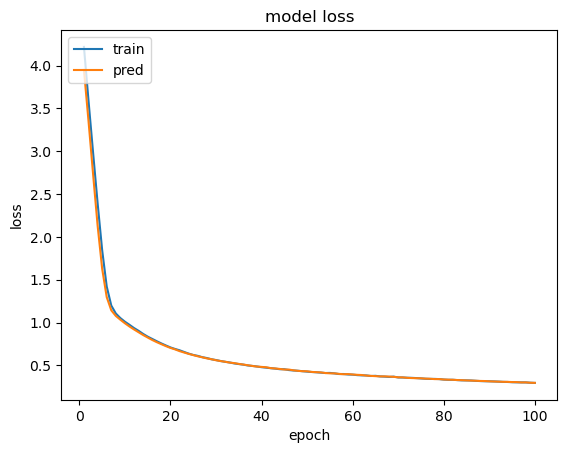

2/2 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.9778

 테스트 loss: 0.2973
2/2 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.9778

 테스트 accuracy: 0.9778


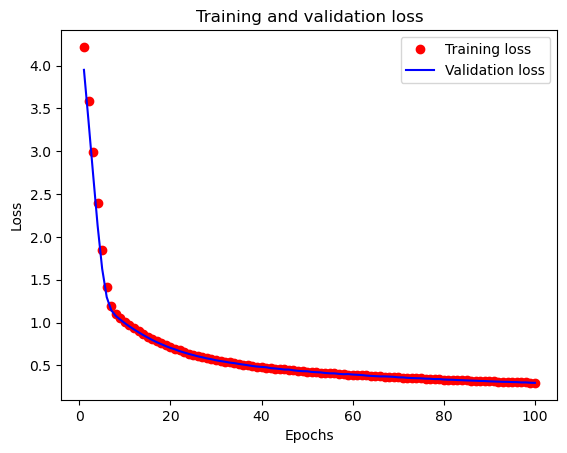

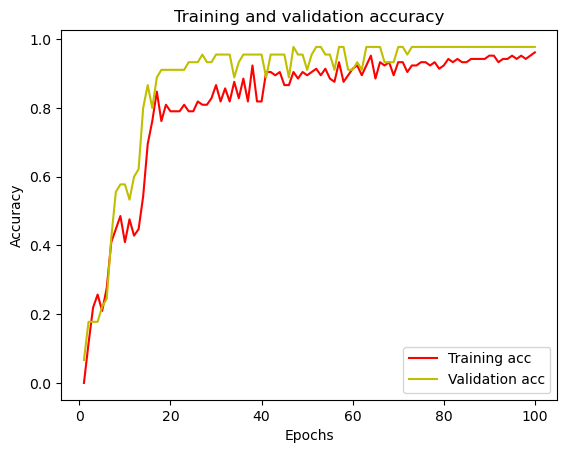

2/2 [==============================] - 0s 2ms/step


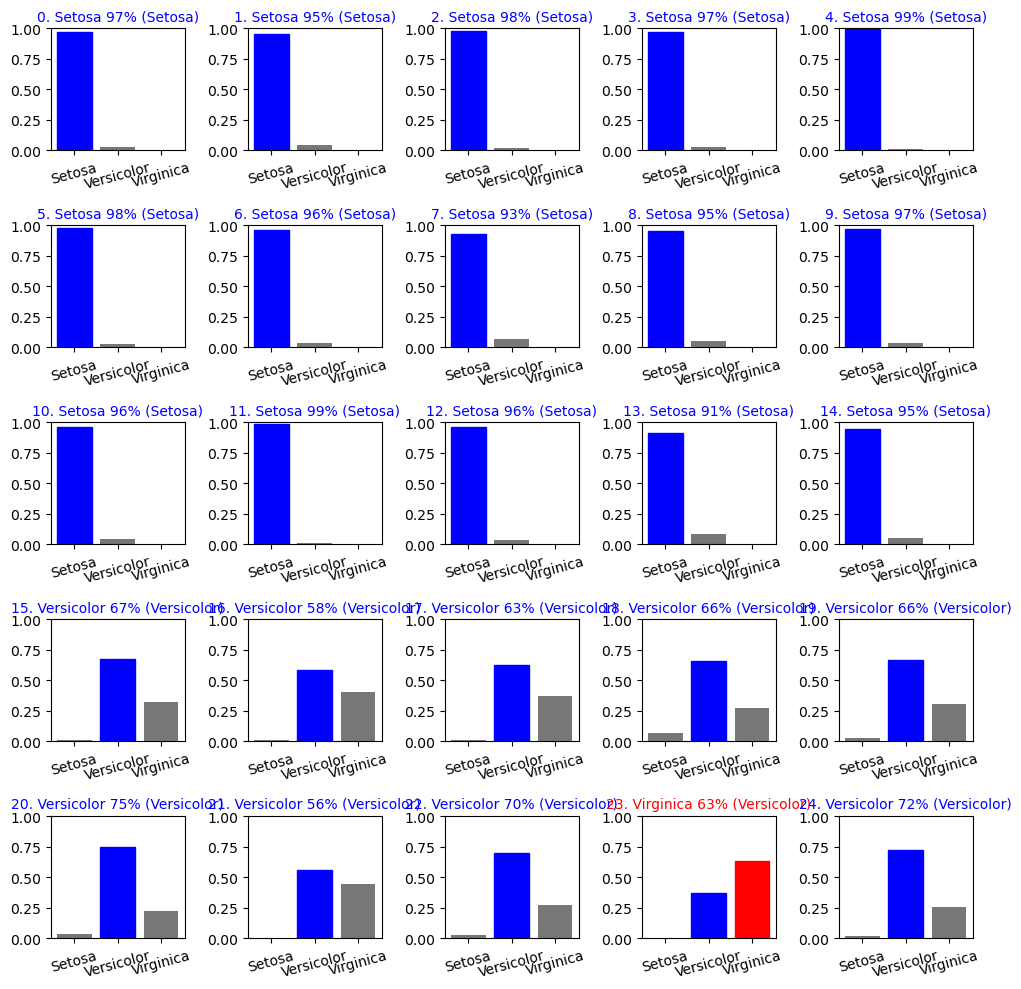

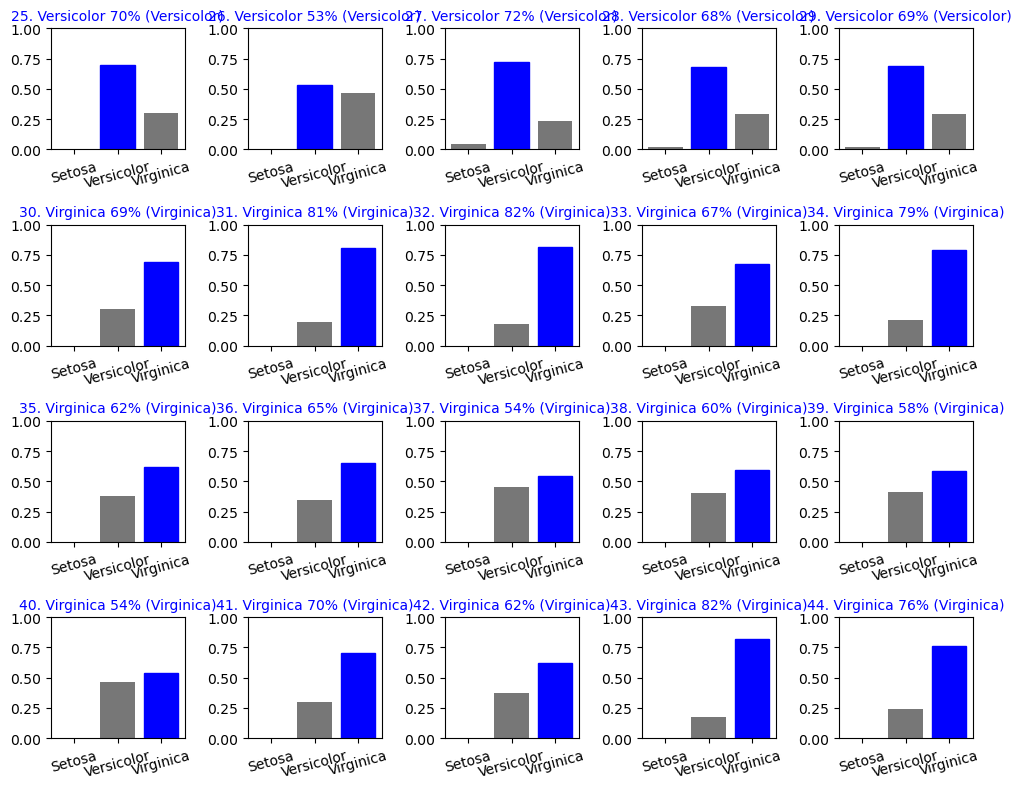

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [9]:

#######################################
#3번 케라스 써서
from SyncRNG import SyncRNG
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
raw_data = pd.read_csv('E:/GoogleDrive/A5팀 프로젝트 자료(12월22일)/dataset/iris.csv')
class_names = ['Setosa','Versicolor','Virginica']

# 데이터 셋  7:3 으로 분할
v=list(range(1,len(raw_data)+1))
s=SyncRNG(seed=38)
ord=s.shuffle(v)
idx=ord[:round(len(raw_data)*0.7)]

# R에서는 데이터프레임이 1부터 시작하기 때문에
# python에서 0행과 R에서 1행이 같은 원리로
# 같은 인덱스 번호를 가진다면 -1을 해주어 같은 데이터를 가지고 오게 한다.
# 인덱스 수정-R이랑 같은 데이터 가져오려고
for i in range(0,len(idx)):
    idx[i]=idx[i]-1

# 학습데이터, 테스트데이터 생성
train=raw_data.loc[idx] # 70%
#train=train.sort_index(ascending=True)
test=raw_data.drop(idx) # 30%

x_train = np.array(train.iloc[:,0:4], dtype=np.float32)
y_train = np.array(train.Species.replace(['setosa','versicolor','virginica'],[0,1,2]))
x_test = np.array(test.iloc[:,0:4], dtype=np.float32)
y_test = np.array(test.Species.replace(['setosa','versicolor','virginica'],[0,1,2]))

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=100, batch_size=1, validation_data=(x_test, y_test_encoded))

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'pred'], loc='upper left')
plt.show()
print("\n 테스트 loss: %.4f" % (model.evaluate(x_test, y_test_encoded)[0]))
print("\n 테스트 accuracy: %.4f" % (model.evaluate(x_test, y_test_encoded)[1]))


import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'ro', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()   # 그림을 초기화합니다
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




###예측 시각화
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(3),class_names,rotation=15)

  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  title_font = {
      'fontsize': 10,
  }
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'


  plt.title("{}. {} {:2.0f}% ({})".format(i,class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color,fontdict=title_font)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')




predictions=model.predict(x_test)

####0~24
num_rows = 5
num_cols = 5
num_table = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_table):
    plt.subplot(num_rows, num_cols,i+1)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


####25~44
num_rows = 4
num_cols = 5
num_table = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_table):
    plt.subplot(num_rows, num_cols,i+1)
    plot_value_array(i+25, predictions[i+25], y_test)
    if i>=19:
        break
plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report
result=[np.argmax(x) for x in predictions]
print(classification_report( result, y_test))   